In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import sys
print(sys.version_info)
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import f1_score

from contextualized.easy import ContextualGAMClassifier

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


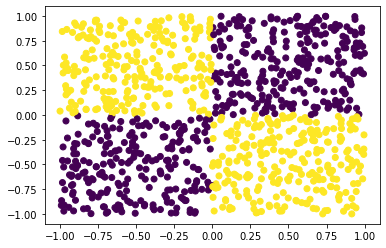

In [2]:
X = np.random.uniform(-1, 1, size=(1000, 2))
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], c=Y)

col_names = [i for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=col_names)
Y = pd.DataFrame(Y).astype(int)
# Model can handle either regression or classification, but plotting currently implemented for classification.

In [3]:
contextual_feats = col_names
explainable_feats = []
for feat in contextual_feats:
    explainable_name = "{} Elev.".format(feat)
    X[explainable_name] = X[feat] > 0.
    X[explainable_name] = X[explainable_name].astype(int)
    explainable_feats.append(explainable_name)

contextual = X[contextual_feats].copy()
explainable = X[explainable_feats].copy()

C_train, C_test, X_train, X_test, X_all_train, X_all_test, Y_train, Y_test = train_test_split(
    contextual, explainable, X, Y, test_size=0.25)
X_train.shape, Y_train.shape, C_train.shape

((750, 2), (750, 1), (750, 2))

In [4]:
# Fit Contextualized GAMs.
cgam = ContextualGAMClassifier(num_archetypes=X_train.shape[1], 
                                encoder_kwargs={'width': 4, 'layers': 2}, 
                                alpha=1e-1, val_split=0.2, learning_rate=1e-3, n_bootstraps=3)
cgam.fit(C_train.values, X_train.values, Y_train.values)

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  category=PossibleUserWarning,
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params
-----------------------------------------------
0 | metamodel | SubtypeMetamodel | 82    
-----------------------------------------------
82        Trainable params
0         Non-trainable params
82        Total params
0.000     Total estimated model params size (MB)


0.1 1.0 0.5
Received unknown keyword argument alpha, probably ignoring.
Received unknown keyword argument val_split, probably ignoring.


Sanity Checking: 0it [00:00, ?it/s]

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/Users/blengerich/Library/Python/3.7/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params
-----------------------------------------------
0 | metamodel | SubtypeMetamodel | 82    
-----------------------------------------------
82        Trainable params
0         Non-trainable params
82        Total params
0.000     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params
-----------------------------------------------
0 | metamodel | SubtypeMetamodel | 82    
-----------------------------------------------
82        Trainable params
0         Non-trainable params
82        Total params
0.000     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [5]:
train_preds = cgam.predict_proba(C_train.values, X_train.values)[:, 0, 1]
test_preds  = cgam.predict_proba(C_test.values, X_test.values)[:, 0, 1]
results = {
        "cgam": {
            "train": {
                "roc": roc(Y_train, train_preds),
                "f1": f1_score(Y_train, np.round(train_preds))
            },
            "test": {
                "roc": roc(Y_test, test_preds),
                "f1": f1_score(Y_test, np.round(test_preds))
            }}}
print("Train ROC: {:.2f}, F1: {:.2f}".format(results['cgam']['train']['roc'], results['cgam']['train']['f1']))
print("Test ROC: {:.2f}, F1: {:.2f}".format(results['cgam']['test']['roc'], results['cgam']['test']['f1']))

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Predicting: 600it [00:00, ?it/s]

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:175: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")


Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Train ROC: 1.00, F1: 1.00
Test ROC: 1.00, F1: 1.00


In [6]:
# Plot Homogeneous (Background effects).
# In this example of XOR interaction, these effects should be 0.
from scContextualized.plot_utils import plot_homogeneous_tx, plot_heterogeneous

plot_homogeneous_tx(cgam.predict_params, C_train, X_train.values, X_train.columns)

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

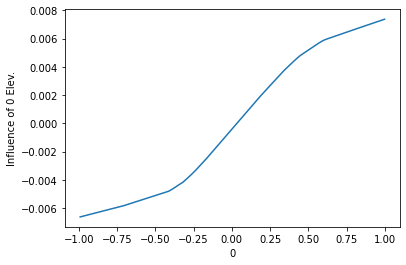

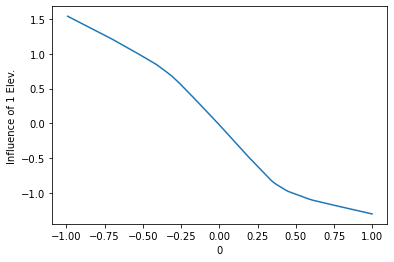

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

In [7]:
# Plot Heterogeneous (Interactive effects).
# In this example of XOR interaction, the cross-effects (1->0 Elevated) and (0->1 Elevated) are strong.
plot_heterogeneous(cgam.predict_params, C_train, X_train.values, 
                   [], np.zeros((C_train.shape[1])), np.ones((C_train.shape[1])),
                   X_train.columns)